<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="Black" size=8px>
                  <b> Capstone Project - Group 3</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="Black" size=6.5px>
                  <b> Gene Classification from DNA Sequence</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Introduction: 

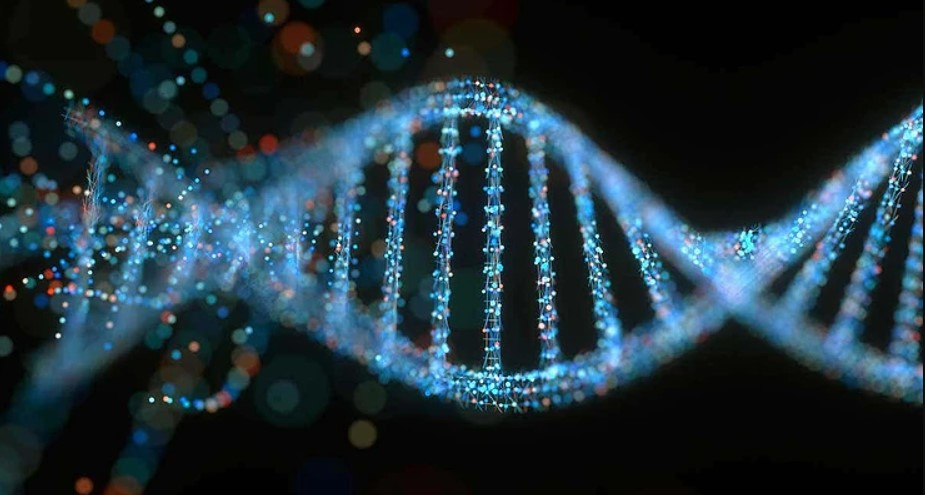

In [1]:
from IPython.display import Image
Image("DNA.jpg")

A genome is a complete collection of DNA in an organism. All living species possess a genome, but they differ considerably in size. The human genome, for instance, is arranged into 23 chromosomes, which is a little bit like an encyclopedia being organized into 23 volumes. And if you counted all the characters (individual DNA “base pairs”), there would be more than 6 billion in each human genome. So it’s a huge compilation.

A human genome has about 6 billion characters or letters. If you think the genome(the complete DNA sequence) is like a book, it is a book about 6 billion letters of “A”, “C”, “G” and “T”. Now, everyone has a unique genome. Nevertheless, scientists find most parts of the human genomes are alike to each other.

As a data-driven science, genomics extensively utilizes machine learning to capture dependencies in data and infer new biological hypotheses. Nonetheless, the ability to extract new insights from the exponentially increasing volume of genomics data requires more powerful machine learning models. By efficiently leveraging large data sets, deep learning has reconstructed fields such as computer vision and natural language processing. It has become the method of preference for many genomics modeling tasks, including predicting the influence of genetic variation on gene regulatory mechanisms such as DNA receptiveness and splicing.

So in this article, we will understand how to interpret a DNA structure and how machine learning algorithms can be used to build a prediction model on DNA sequence data.

### How is a DNA Sequence represented?

The diagram shows a tiny bit of a DNA double helix structure.

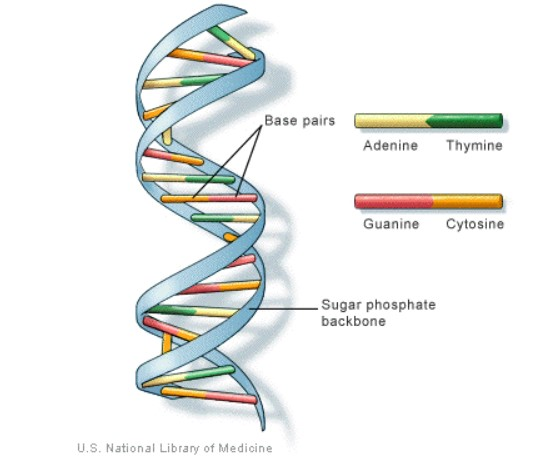

In [2]:
from IPython.display import Image
Image("DNA helix.jpg")

The double-helix is the correct chemical representation of DNA. But DNA is special. It’s a nucleotide made of four types of nitrogen bases: Adenine (A), Thymine (T), Guanine (G), and Cytosine. We always call them A, C, Gand T.

These four chemicals link together via hydrogen bonds in any possible order making a chain, and this gives one thread of the DNA double-helix. And the second thread of the double-helix balance the first. So if you have A on the first thread, you have to have T on the second.

Furthermore, C and G always balance each other. So once you identify one thread of the helix, you can always spell the other.

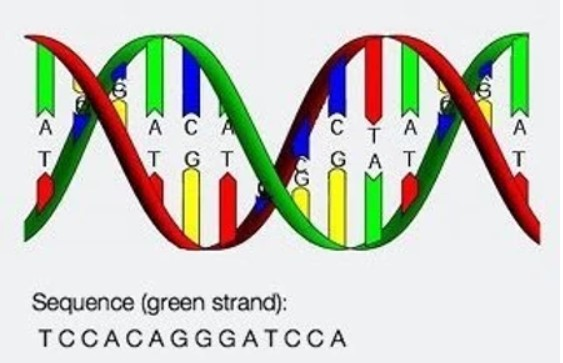

In [3]:
from IPython.display import Image
Image("Seq.jpg")

The order, or sequence, of these bases, determines what biological instructions are contained in a strand of DNA. For example, the sequence ATCGTT might instruct for blue eyes, while ATCGCT might instruct for brown.

## DNA data handling using Biopython

Biopython is a large open-source application programming interface (API) used in both bioinformatics software development and in everyday scripts for common bioinformatics tasks

Here is a brief example of how to work with a DNA sequence in fasta format using Biopython. The sequence object will contain attributes such as id and sequence and the length of the sequence that you can work with directly.
We will use Bio.SeqIO from Biopython for parsing DNA sequence data(fasta).

It provides a simple uniform interface to input and output assorted sequence file formats.

In [4]:
from Bio import SeqIO
for sequence in SeqIO.parse('example_dna.fa', "fasta"):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAG

So it produces the sequence ID, sequence and length of the sequence.

# Loading Datasets:

## Now that we can load and manipulate biological sequence data easily, how can we use it for machine learning or deep learning?

Now since machine learning or deep learning models require input to be feature matrices or numerical values and currently we still have our data in character or string format. So the next step is to encode these characters into matrices.

**Objective**: Build a classification model that is trained on the human DNA sequence and can predict a gene family based on the DNA sequence of the coding sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

Gene families are groups of related genes that share a common ancestor. Members of gene families may be paralogs or orthologs. Gene paralogs are genes with similar sequences from within the same species while gene orthologs are genes with similar sequences in different species.

The dataset contains human DNA sequence, Dog DNA sequence, and Chimpanzee DNA sequence

## Let's import the required libraries:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Loading Human DNA dataset

In [6]:
human_dna=pd.read_table('human.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Let's check for the class distribution in human dataset:

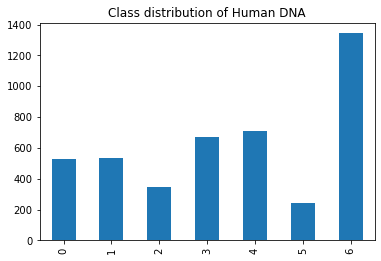

In [7]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")
plt.show()

### Load Chimpanzee DNA data:

In [8]:
chimp_dna = pd.read_table('chimpanzee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


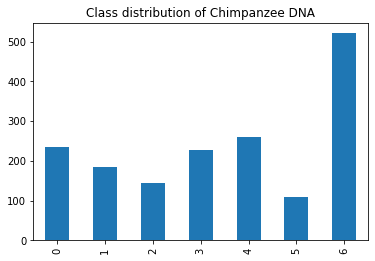

In [9]:
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")
plt.show()

### Load Dog DNA data:

In [10]:
dog_dna = pd.read_table('dog.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


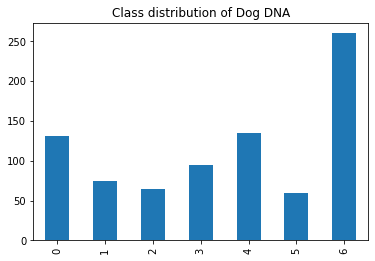

In [11]:
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")
plt.show()

### Load Elephant DNA data:

In [79]:
#elephant_dna = pd.read_table('Elephant.txt')
#elephant_dna.rename(columns=
                    #{'>lcl|NW_003573426.1_cds_XP_023400434.1_1 [gene=LOC100673859] [db_xref=GeneID:100673859] [protein=zinc finger protein 782-like isoform X1] [protein_id=XP_023400434.1] [location=join(184238..184391,185004..185062,192211..192337,197945..198040,206466..208591)] [gbkey=CDS]':'sequence'}, inplace=True)

In [80]:
#elephant_dna.head()

,sequence
0,ATGATGGTTCATGAAAGATGTCTGTGGTTATCGATTTCTGACCCTT...
1,CTGAGAGAGTCAGTGAATTGTCCAGGACTGCCCAGTTTGTGACAGA...
2,TCGGTCTCTCACAGTTGAGCCTTCTCAATTGTCTACACTCTCCCAA...
3,CAGGCTTCAGTGTCATTCAAGGACGTGGCTGTGTTGCTGACCCAGG...
4,CCCAGAGGACCCTGTACAGAGATGTGATGCTGGAGAACTACAGCCA...


In [81]:
#cow_dna = pd.read_table('cow.txt')
#cow_dna.rename(columns={">lcl|MKHE01000005.1_cds_OWK14967.1_1 [locus_tag=Celaphus_00000001] [db_xref=GO:0005515,InterPro:IPR003599,InterPro:IPR007110,InterPro:IPR013106,InterPro:IPR013783,PFAM:PF07686] [protein=hypothetical protein] [partial=3'] [protein_id=OWK14967.1] [location=complement(join(<8304..8629,8659..8674))] [gbkey=CDS]":"sequence"},inplace=True)

In [82]:
#cow_dna.head()

## Gene Family Description:

Here are the definitions for each of the 7 classes and how many there are in the human training data

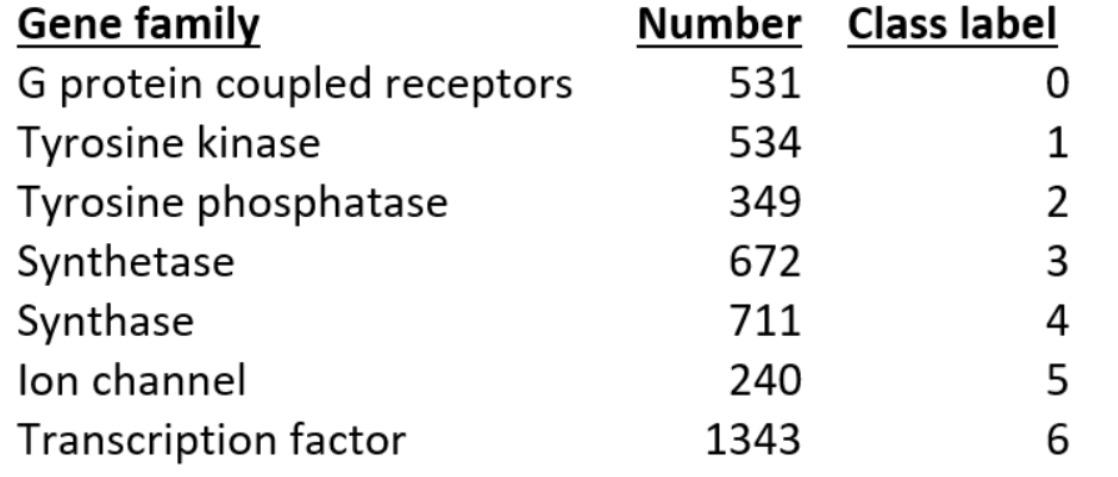

In [83]:
from IPython.display import Image
Image("Gene fam.jpeg")

Let us check for the distribution of DNA Sequences in each organinsm datasets.

In [91]:
#Considering Human DNA
human_dna["length"] = human_dna.sequence.apply(lambda x : len(x))  # finding the length of each DNA Sequence

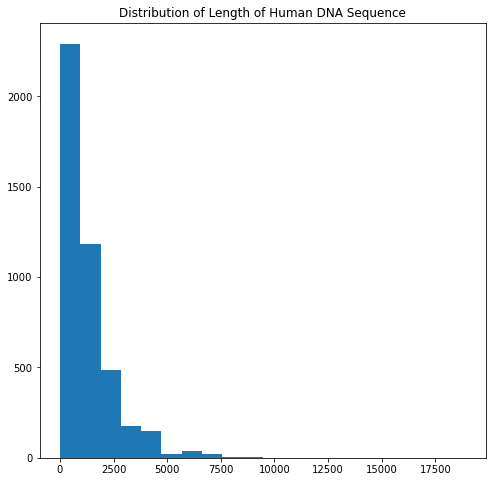

In [92]:
plt.figure(figsize=(8,8));
plt.hist(human_dna["length"],bins=20)
plt.title("Distribution of Length of Human DNA Sequence")
plt.show()

In [94]:
#For Chimpanzee and Dog DNA sequence dataset:
chimp_dna["length"] = chimp_dna.sequence.apply(lambda x : len(x))
dog_dna["length"] = dog_dna.sequence.apply(lambda x : len(x))

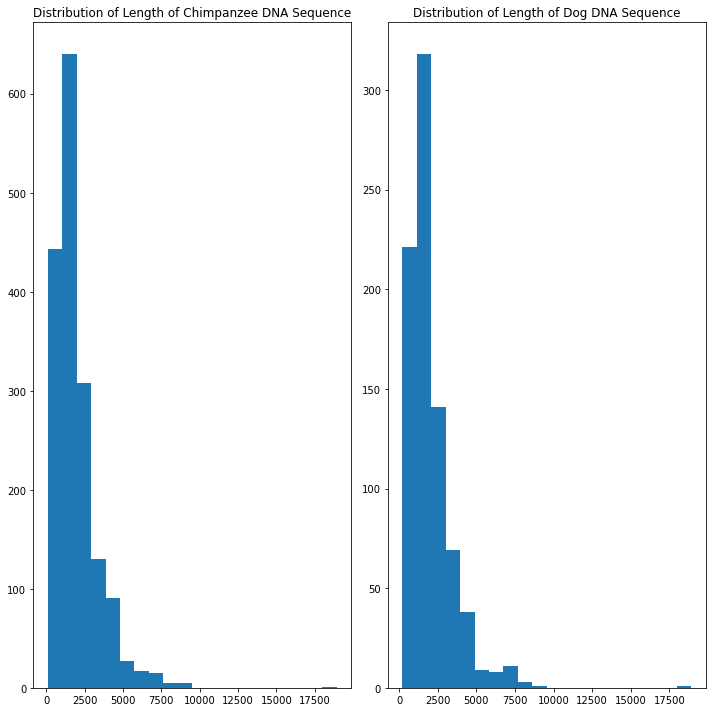

In [105]:
plt.figure(figsize=(10,10));
plt.subplot(1,2,1)
plt.hist(chimp_dna["length"],bins=20)
plt.title("Distribution of Length of Chimpanzee DNA Sequence")
plt.subplot(1,2,2)
plt.hist(dog_dna["length"],bins=20)
plt.title("Distribution of Length of Dog DNA Sequence")
plt.tight_layout()
plt.show()

Length of the Sequence varies alot. We have to find a way to make it as constant so that we can apply ML Techniques to this problem.

## Natural language processing (NLP):

Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can

### DNA sequence as a “language”, known as k-mer counting

A hurdle that still remains is that none of these above methods results in vectors of uniform length, and that is a necessity for feeding data to a classification or regression algorithm. So with the above methods, you have to resort to things like truncating sequences or padding with “n” or “0” to get vectors of uniform length.

DNA and protein sequences can be seen as the language of life. The language encodes instructions as well as functions for the molecules that are found in all life forms. The sequence language resemblance continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides are words, and nucleotide bases and amino acids are the alphabets. Since the relationship seems so likely, it stands to reason that the natural language processing(NLP) should also implement the natural language of DNA and protein sequences.

The method we use here is manageable and easy. We first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use “words” of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.

In genomics, we refer to these types of manipulations as “k-mer counting”, or counting the occurrences of each possible k-mer sequence and Python natural language processing tools make it super easy.

Now we have all our data loaded, the next step is to convert a sequence of characters into k-mer words, default size = 6 (hexamers). The function Kmers_funct() will collect all possible overlapping k-mers of a specified length from any sequence string.

In [18]:
human_dna.columns

Index(['sequence', 'class'], dtype='object')

In [19]:
chimp_dna.columns

Index(['sequence', 'class'], dtype='object')

In [22]:
dog_dna.columns

Index(['sequence', 'class'], dtype='object')

In [106]:
#apply kmers function to all datasets & join all words to list 
#then add words column & drop sequence column
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [107]:
#convert our training data sequences into short overlapping k-mers of length 6. 
#Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)


In [108]:
human_dna.head()

,class,length,words
0,4,207,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,681,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,1686,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,1206,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,1437,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [109]:
chimp_dna.head()

,class,length,words
0,4,207,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,681,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,1248,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,1239,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,1008,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [110]:
dog_dna.head()

,class,length,words
0,4,204,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,681,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,1044,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,1044,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,966,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


We need to now convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. We will make a target variable y to hold the class labels.

In [111]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

In [112]:
# Now let's do the same for chimp and dog:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

In [113]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [114]:
y_chim

array([4, 4, 4, ..., 6, 3, 3], dtype=int64)

In [115]:
y_dog

array([4, 4, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 3, 0, 6, 3, 3, 6,
       4, 4, 5, 6, 6, 1, 5, 2, 2, 1, 4, 2, 6, 3, 3, 6, 6, 6, 3, 3, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 5, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 3, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       4, 6, 4, 4, 2, 1, 3, 6, 0, 6, 2, 3, 0, 0, 6, 0, 6, 4, 3, 1, 1, 4,
       6, 4, 4, 6, 3, 3, 2, 2, 1, 1, 3, 3, 4, 3, 0, 3, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 0, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 5, 5, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

So the target variable contains an array of class values.

## CountVectorizer(): 

Creating the Bag of Words model using CountVectorizer(). This is equivalent to k-mer counting. The n-gram size of 4 was previously determined by testing.

Convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [119]:
#This is the Count_Vectorizer's Vocabulary
i=0
for key,value in cv.vocabulary_.items():
    print(f"{key} : {value}")
    i+=1
    if i>10:break

atgccc tgcccc gcccca ccccaa : 52803
tgcccc gcccca ccccaa cccaac : 207969
gcccca ccccaa cccaac ccaact : 136621
ccccaa cccaac ccaact caacta : 79202
cccaac ccaact caacta aactaa : 78295
ccaact caacta aactaa actaaa : 74681
caacta aactaa actaaa ctaaat : 60650
aactaa actaaa ctaaat taaata : 6563
actaaa ctaaat taaata aaatac : 25724
ctaaat taaata aaatac aatact : 101750
taaata aaatac aatact atacta : 176196


In [117]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


So, for humans we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For chimp and dog, we have the same number of features with 1682 and 820 genes respectively.

So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.

Here I will use the human data to train the model, holding out 20% of the human data to test the model. Then we can challenge the model’s generalizability by trying to predict sequence function in other species (the chimpanzee and dog).

Next, train/test split human dataset and build the models.

You might want to do some parameter tuning and build a model with different ngram sizes, here we will go ahead with an ngram size of 4 and build the models.

In [120]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=10)

## Model Building:

In [180]:
#Importing the libraries for model building and also the performance metices:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_score,recall_score,f1_score

### Model 01: K-Nearest Neighbor (KNN) Algorithm.

In [122]:
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = KNNclassifier.predict(X_test)

**Confusion matrix for Human datset**:

In [140]:
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Predicted   0    1   2   3    4   5    6
Actual                                  
0          83    2   0   2    3   6    3
1           8  100   0   5    4   0    6
2           3    0  62   1    3   0    3
3          17    2   2  97    2   2    5
4          14    4   0   2  122   1   13
5           6    1   0   2    0  29    3
6          23    4   4   4    2   1  220


**The Classification Report of Human dataset:**

In [63]:
print(classification_report(y_test,y_pred))

The Classification Report of Human dataset:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        99
           1       0.75      0.88      0.81       123
           2       1.00      0.75      0.86        72
           3       1.00      0.81      0.90       127
           4       1.00      0.60      0.75       156
           5       1.00      0.68      0.81        41
           6       0.73      0.97      0.83       258

    accuracy                           0.82       876
   macro avg       0.88      0.78      0.82       876
weighted avg       0.85      0.82      0.82       876



In [124]:
print('The accuracy score for human test dataset using KNN:',accuracy_score(y_test,y_pred))

The accuracy score for human test dataset using KNN: 0.8162100456621004


### Now let's predict for chimpanzee and dog datasets:

In [141]:
y_pred_chimp = KNNclassifier.predict(X_chimp)

In [146]:
print('Confusin_matrix for chimpanzee dataset:')
print()
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

Confusin_matrix for chimpanzee dataset:

Predicted    0    1    2    3    4    5    6
Actual                                      
0          220    3    0    0    0    0   11
1            0  175    0    0    0    0   10
2            4    0  134    0    0    0    6
3            0    4    0  218    0    0    6
4           25    3    0    0  208    0   25
5            5    0    0    0    0  102    2
6            0    9    0    0    0    0  512


In [132]:
print('classification of chimpanzee dataset:')
print(classification_report(y_chim,y_pred_chimp))
print('The accuracy score is:',accuracy_score(y_chim,y_pred_chimp))

classification of chimpanzee dataset:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       234
           1       0.90      0.95      0.92       185
           2       1.00      0.93      0.96       144
           3       1.00      0.96      0.98       228
           4       1.00      0.80      0.89       261
           5       1.00      0.94      0.97       109
           6       0.90      0.98      0.94       521

    accuracy                           0.93      1682
   macro avg       0.95      0.93      0.94      1682
weighted avg       0.94      0.93      0.93      1682

The accuracy score is: 0.9328180737217598


In [143]:
y_pred_dog = KNNclassifier.predict(X_dog)

In [145]:
print('Confusin_matrix for dog dataset:')
print()
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

Confusin_matrix for dog dataset:

Predicted   0   1   2   3   4   5    6
Actual                                
0          28  33   0   0   0   0   70
1           0  31   0   0   0   0   44
2           9  12  23   0   0   0   20
3           0  19   0  17   0   0   59
4           7  31   0   0  22   0   75
5           6  12   0   0   0  21   21
6           0  39   0   0   0   0  221


In [136]:
print('classification of dog dna dataset:')
print(classification_report(y_dog,y_pred_dog))
print('The accuracy score is:',accuracy_score(y_dog,y_pred_dog))

classification of dog dna dataset:
              precision    recall  f1-score   support

           0       0.56      0.21      0.31       131
           1       0.18      0.41      0.25        75
           2       1.00      0.36      0.53        64
           3       1.00      0.18      0.30        95
           4       1.00      0.16      0.28       135
           5       1.00      0.35      0.52        60
           6       0.43      0.85      0.57       260

    accuracy                           0.44       820
   macro avg       0.74      0.36      0.39       820
weighted avg       0.67      0.44      0.41       820

The accuracy score is: 0.4426829268292683


**Inference**: KNN algorithm is giving a good accuracy scores for human & chimpanzee datasets as 82% and 93% whereas for dog the accuracy score is 44% which is not that good accuracy value for prediction.
    Therefore can be observed that this model is not suitable the predictions for ortholog gene families.

Let us try implementing other models and check for accuracy scores.

## Model 02: SVC() Algorithm 

In [156]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [158]:
#Implementing the algorithm for human dna dataset:
y_pred1=svc.predict(X_test)

In [159]:
print('Confusion_matrix for Human dna using DecisionClassifier')
print()
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred1, name='Predicted')))

Confusion_matrix for Human dna using DecisionClassifier

Predicted   0   1   2   3    4   5    6
Actual                                 
0          72   0   0   0    0   0   27
1           0  95   0   0    0   0   28
2           0   0  53   0    0   0   19
3           0   0   0  91    0   0   36
4           0   0   0   0  112   0   44
5           0   0   0   0    0  27   14
6           0   0   0   0    0   0  258


In [160]:
print('Classification report of Human DNA:')
print(classification_report(y_test,y_pred1))
print('The Accuracy score :',accuracy_score(y_test,y_pred1))

Classification report of Human DNA:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        99
           1       1.00      0.77      0.87       123
           2       1.00      0.74      0.85        72
           3       1.00      0.72      0.83       127
           4       1.00      0.72      0.84       156
           5       1.00      0.66      0.79        41
           6       0.61      1.00      0.75       258

    accuracy                           0.81       876
   macro avg       0.94      0.76      0.83       876
weighted avg       0.88      0.81      0.82       876

The Accuracy score : 0.8082191780821918


### Let's predict for chimpanzee and dog datasets:

In [161]:
y_pred_chimp1 = svc.predict(X_chimp)

In [163]:
print('Confusion_matrix for Chimpanzee dna using DecisionClassifier')
print()
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp1, name='Predicted')))

Confusion_matrix for Chimpanzee dna using DecisionClassifier

Predicted    0    1    2    3    4    5    6
Actual                                      
0          214    0    0    0    0    0   20
1            0  177    0    0    0    0    8
2            0    0  136    0    0    0    8
3            0    0    0  210    0    0   18
4            0    0    0    0  244    0   17
5            2    0    0    0    0  103    4
6            0    0    0    0    0    0  521


In [164]:
print('classification of Chimpanzee dna dataset:')
print(classification_report(y_chim,y_pred_chimp1))
print('The accuracy score is:',accuracy_score(y_chim,y_pred_chimp1))

classification of Chimpanzee dna dataset:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       234
           1       1.00      0.96      0.98       185
           2       1.00      0.94      0.97       144
           3       1.00      0.92      0.96       228
           4       1.00      0.93      0.97       261
           5       1.00      0.94      0.97       109
           6       0.87      1.00      0.93       521

    accuracy                           0.95      1682
   macro avg       0.98      0.95      0.96      1682
weighted avg       0.96      0.95      0.95      1682

The accuracy score is: 0.9542211652794292


In [165]:
y_pred_dog1 = svc.predict(X_dog)

In [202]:
print('Confusion_matrix for DOG dna using Support Vector Classifier')
print()
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog1, name='Predicted')))

Confusion_matrix for DOG dna using Support Vector Classifier

Predicted   0   1  2   3   4  5    6
Actual                              
0          64   0  0   0   0  0   67
1           2  12  0   0   0  0   61
2           5   0  5   0   0  0   54
3           4   0  0  17   0  0   74
4           1   0  0   0  56  0   78
5           5   0  0   0   0  6   49
6           0   0  0   0   0  0  260


In [167]:
print('classification of dog dna dataset:')
print(classification_report(y_dog,y_pred_dog1))
print('The accuracy score is:',accuracy_score(y_dog,y_pred_dog1))

classification of dog dna dataset:
              precision    recall  f1-score   support

           0       0.79      0.49      0.60       131
           1       1.00      0.16      0.28        75
           2       1.00      0.08      0.14        64
           3       1.00      0.18      0.30        95
           4       1.00      0.41      0.59       135
           5       1.00      0.10      0.18        60
           6       0.40      1.00      0.58       260

    accuracy                           0.51       820
   macro avg       0.88      0.35      0.38       820
weighted avg       0.78      0.51      0.46       820

The accuracy score is: 0.5121951219512195


**Inference:** SVC algorithm is giving a good accuracy scores for human & chimpanzee datasets as 80% and 95% whereas for dog the accuracy score is 51% which is not that good accuracy value for prediction. Even in this model the accuracy scores have not improved so well.

### Now just to check the accuracy scores for human DNA datasets lets try implementing DecisionClassifier, Random Forest Classifier and also MultinomialNB algorithms.

In [181]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [175]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict,

In [192]:
from sklearn.tree import DecisionTreeClassifier
print("Decision Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=7,shuffle=True,random_state=42).split(X,y_human)):
    dt =DecisionTreeClassifier()
    dt.fit(X[train_index],y_human[train_index])
    pred=dt.predict(X[val_index])
    accuracy,precision, recall, f1 = get_metrics(y_human[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Decision Classifier :
0 Iteration : Accuracy = 0.81949     F1_Score = 0.82284
1 Iteration : Accuracy = 0.81310     F1_Score = 0.81767
2 Iteration : Accuracy = 0.83866     F1_Score = 0.84191
3 Iteration : Accuracy = 0.83067     F1_Score = 0.83359
4 Iteration : Accuracy = 0.83546     F1_Score = 0.83917
5 Iteration : Accuracy = 0.83040     F1_Score = 0.83396
6 Iteration : Accuracy = 0.82560     F1_Score = 0.83013


In [197]:
from sklearn.naive_bayes import MultinomialNB
print("Naive Bayes Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=7,shuffle=True,random_state=42).split(X,y_human)):
    classifier = MultinomialNB(alpha=0.1)
    classifier.fit(X[train_index],y_human[train_index])
    pred=classifier.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y_human[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Classifier :
0 Iteration : Accuracy = 0.99201    F1_Score = 0.99202
1 Iteration : Accuracy = 0.98243    F1_Score = 0.98244
2 Iteration : Accuracy = 0.97923    F1_Score = 0.97928
3 Iteration : Accuracy = 0.96965    F1_Score = 0.96966
4 Iteration : Accuracy = 0.98083    F1_Score = 0.98079
5 Iteration : Accuracy = 0.99040    F1_Score = 0.99039
6 Iteration : Accuracy = 0.97920    F1_Score = 0.97922


In [198]:
from sklearn.ensemble import RandomForestClassifier
print("Random Forest Classifier :")
for i,(train_index,val_index)  in enumerate(StratifiedKFold(n_splits=7,shuffle=True,random_state=42).split(X,y_human)):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(X[train_index],y_human[train_index])
    pred=rf.predict(X[val_index])
    accuracy, precision, recall, f1 = get_metrics(y_human[val_index], pred)
    print(str(i)+" Iteration : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Random Forest Classifier :
0 Iteration : Accuracy = 0.92971     F1_Score = 0.93064
1 Iteration : Accuracy = 0.92971     F1_Score = 0.92961
2 Iteration : Accuracy = 0.91374     F1_Score = 0.91449
3 Iteration : Accuracy = 0.91374     F1_Score = 0.91679
4 Iteration : Accuracy = 0.92971     F1_Score = 0.93024
5 Iteration : Accuracy = 0.91200     F1_Score = 0.91475
6 Iteration : Accuracy = 0.92160     F1_Score = 0.92279


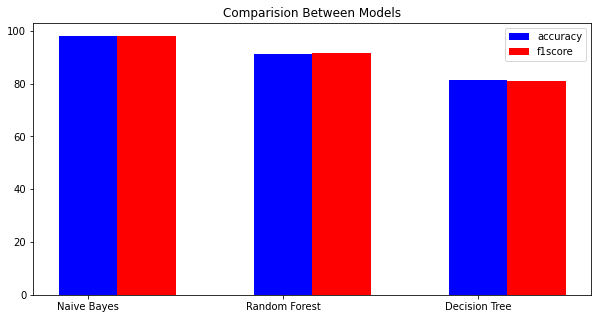

In [266]:
#scores ={"Naive Bayes":98.059  ,"Random Forest":91.4 ,"Decision Tree": 81.5}
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree"]
accscore=[98.059,91.4,81.5]
f1score=[98.061,91.5,81.1]
w=0.3
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy",color='blue')
plt.bar(bar2,f1score,w,label="f1score",color='red')
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
plt.show()

**Inference**: From the above graph it can be observed that implementation of Naive_Bayes algorithm can give good accuracy score for the datasets which is above 95%.

### As we are not obtaining a good accuracy score for orthologs in the above classification models and there are lot of variations in each model for different organisma let now try implementing neural network models and check for the accuracy scores in all DNA datasets. 

The nodes of the layers are neurons using nonlinear activation functions, except for the nodes of the input layer.
There can be one or more non-linear hidden layers between the input and the output layer.

**For instance to explain about MLP and Perceptron algorithms.**

In [207]:
from sklearn.neural_network import MLPClassifier

In [208]:
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]

In [209]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [210]:
print(clf.fit(X, y))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

solver: {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’

The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score.

For small datasets, however, ‘lbfgs’ can converge faster and perform better.

max_iter: int, default=200

Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

shuffle: bool, default=True Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.

random_state: int, RandomState instance, default=None

Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’. Pass an int for reproducible results across multiple function calls. tolfloat, default=1e-4

momentum: float, default=0.9 Momentum for gradient descent update. Should be between 0 and 1. Only used when solver=’sgd’.

The following diagram depicts the neural network, that we have trained for our classifier clf. We have two input nodes X0 and X1, called the input layer, and one output neuron 'Out'. We have two hidden layers the first one with the neurons H00 ... H04 and the second hidden layer consisting of H10 and H11. Each neuron of the hidden layers and the output neuron possesses a corresponding Bias, i.e. B00 is the corresponding Bias to the neuron H00, B01 is the corresponding Bias to the neuron H01 and so on.

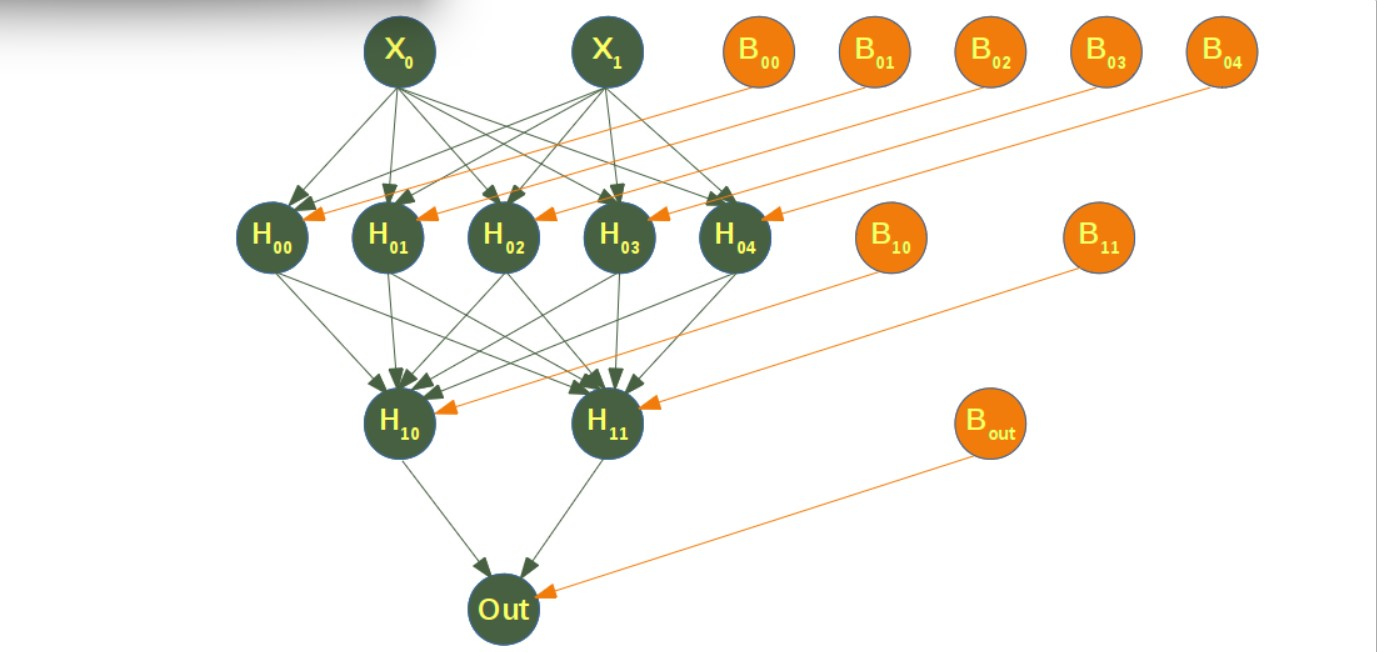

In [211]:
from IPython.display import Image
Image("neural_network.jpg")

In [212]:
#The attribute coefs_ contains a list of weight matrices for every layer. 
#The weight matrix at index i holds the weights between the layer i and layer i + 1.
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


The summation formula of the neuron H00 is defined by:

wixi=w0x0+w1x1+wB11∗B11

We can get the values for w0 and w1 from clf.coefs_ like this:

w0= clf.coefs_[0][0][0] and w1= clf.coefs_[0][1][0]

In [213]:
w0=clf.coefs_[0][0][0] 
w1=clf.coefs_[0][1][0]
print(w0,w1)

-0.1420369126782716 -0.6978111149778672


In [214]:
#The weight vector of H00 can be accessed with
clf.coefs_[0][:,0]

array([-0.14203691, -0.69781111])

In [215]:
#We can generalize the above to access a neuron Hij in the following way:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.14203691 -0.69781111], 
0 1 [-1.18304359 -3.5850093 ], 
0 2 [-0.85567518 -0.26436018], 
0 3 [-4.53250719 -4.39161248], 
0 4 [-0.60466275  0.06644423], 

1 0 [ 0.29179638  4.02666592 -0.51677234  7.37215202  0.32920668], 
1 1 [-0.14155284 -0.61556475  0.51479708 -0.31936965  0.64428109], 

2 0 [-4.96774269 -0.86330397], 



In [216]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-0.14962269 -0.59232707 -0.5472481   7.02667699 -0.87510813]

Bias values for second hidden layer:
[-3.61417672 -0.76834882]


The main reason, why we train a classifier is to predict results for new samples. We can do this with the predict method. The method returns a predicted class for a sample, in our case a "0" or a "1" :

In [217]:
result = clf.predict([[0, 0], [0, 1], 
                      [1, 0], [0, 1], 
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])
print(result)

[0 0 0 0 1 1 1 1]


In [218]:
prob_results = clf.predict_proba([[0, 0], [0, 1], 
                                  [1, 0], [0, 1], 
                                  [1, 1], [2., 2.], 
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)

[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]


## Model Building using Neural Network algorithms: 

### Model 1: MLP() Algorithm 

**MultiLayer Perceptron:** A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.

In [220]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(25,25,25))
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(25, 25, 25))

In [224]:
y_pred=clf.predict(X_test)

In [225]:
print('Confusion_matrix using MLP neural network on human DNA dataset:')
print()
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Confusion_matrix using MLP neural network on human DNA dataset:

Predicted   0    1   2    3    4   5    6
Actual                                   
0          91    0   0    0    6   0    2
1           0  118   0    0    2   0    3
2           1    0  70    0    0   0    1
3           0    0   1  120    6   0    0
4           0    0   0    0  153   0    3
5           0    0   0    0    2  39    0
6           1    0   0    0    2   0  255


In [231]:
print('classification of Human DNA dataset:')
print(classification_report(y_test,y_pred))
print('The accuracy score is:',accuracy_score(y_test,y_pred))

classification of Human DNA dataset:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        99
           1       1.00      0.96      0.98       123
           2       0.99      0.97      0.98        72
           3       1.00      0.94      0.97       127
           4       0.89      0.98      0.94       156
           5       1.00      0.95      0.97        41
           6       0.97      0.99      0.98       258

    accuracy                           0.97       876
   macro avg       0.98      0.96      0.97       876
weighted avg       0.97      0.97      0.97       876

The accuracy score is: 0.9657534246575342


Here the accuracy_score has increased for human dataset let's try implementing for chimpanzee and dog datasets.

In [229]:
#Chimpanzee DNA Dataset
y_pred_chimp=clf.predict(X_chimp)

In [230]:
print('Confusion_matrix using MLP neural network on chimpanzee DNA dataset:')
print()
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

Confusion_matrix using MLP neural network on chimpanzee DNA dataset:

Predicted    0    1    2    3    4    5    6
Actual                                      
0          226    0    0    0    0    0    0
1            0  183    0    0    0    0    0
2            0    0  144    0    0    0    0
3            0    0    0  223    0    0    0
4            0    0    0    0  278    0    0
5            0    0    0    0    0  108    0
6            0    0    0    0    0    0  520


In [232]:
print('classification of Chimpanzee dna dataset:')
print(classification_report(y_test,y_pred))
print('The accuracy score is:',accuracy_score(y_chim,y_pred_chimp))

classification of Chimpanzee dna dataset:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        99
           1       1.00      0.96      0.98       123
           2       0.99      0.97      0.98        72
           3       1.00      0.94      0.97       127
           4       0.89      0.98      0.94       156
           5       1.00      0.95      0.97        41
           6       0.97      0.99      0.98       258

    accuracy                           0.97       876
   macro avg       0.98      0.96      0.97       876
weighted avg       0.97      0.97      0.97       876

The accuracy score is: 1.0


In [233]:
# Dog DNA dataset:
y_pred_dog=clf.predict(X_dog)

In [234]:
print('Confusion_matrix using MLP neural network on Dog DNA dataset:')
print()
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

Confusion_matrix using MLP neural network on Dog DNA dataset:

Predicted    0   1   2   3    4   5    6
Actual                                  
0          112   0   0   0   14   0    5
1            0  48   0   0   18   0    9
2            0   0  61   0    1   0    2
3            2   0   4  41   47   0    1
4            2   0   0   0  131   0    2
5            0   0   0   0   22  38    0
6            0   0   0   0    1   0  259


In [235]:
print('classification of Dog dna dataset:')
print(classification_report(y_dog,y_pred_dog))
print('The accuracy score is:',accuracy_score(y_dog,y_pred_dog))

classification of Dog dna dataset:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       131
           1       1.00      0.64      0.78        75
           2       0.94      0.95      0.95        64
           3       1.00      0.43      0.60        95
           4       0.56      0.97      0.71       135
           5       1.00      0.63      0.78        60
           6       0.93      1.00      0.96       260

    accuracy                           0.84       820
   macro avg       0.91      0.78      0.81       820
weighted avg       0.90      0.84      0.84       820

The accuracy score is: 0.8414634146341463


**Inference**: From MLP Algorithm we can observe that the accuarcy score for all the DNA datasets has increased and is giving a good predicting values.

### Model 2: Perceptron() Algorithm

**Perceptron:** A Perceptron is a neural network unit that does certain computations to detect features or business intelligence in the input data. It is a function that maps its input “x,” which is multiplied by the learned weight coefficient, and generates an output value ”f(x).

In [236]:
#Import library
from sklearn.linear_model import Perceptron

In [237]:
p = Perceptron(random_state=10,max_iter=10,tol=0.001)
p.fit(X_train, y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=10, random_state=10)

In [239]:
#Human DNA dataset:
y_pred=p.predict(X_test)

In [243]:
print('Confusion_matrix using Perceptron neural network on human DNA dataset:')
print()
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Confusion_matrix using Perceptron neural network on human DNA dataset:

Predicted   0    1   2    3    4   5    6
Actual                                   
0          92    1   0    2    2   1    1
1           1  119   0    1    0   0    2
2           0    2  70    0    0   0    0
3           0    1   0  117    4   1    4
4           2    1   3    1  145   0    4
5           0    0   1    0    0  40    0
6           4    1   1    1    1   0  250


In [241]:
print('classification of Human DNA dataset:')
print(classification_report(y_test,y_pred))
print('The accuracy score is:',accuracy_score(y_test,y_pred))

classification of Human DNA dataset:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        99
           1       0.95      0.97      0.96       123
           2       0.93      0.97      0.95        72
           3       0.96      0.92      0.94       127
           4       0.95      0.93      0.94       156
           5       0.95      0.98      0.96        41
           6       0.96      0.97      0.96       258

    accuracy                           0.95       876
   macro avg       0.95      0.95      0.95       876
weighted avg       0.95      0.95      0.95       876

The accuracy score is: 0.9509132420091324


In [242]:
# For Chimpanzee Dataset:
y_pred_chimp=p.predict(X_chimp)

In [244]:
print('Confusion_matrix using Perceptron neural network on Chimpanzee DNA dataset:')
print()
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))

Confusion_matrix using Perceptron neural network on Chimpanzee DNA dataset:

Predicted    0    1    2    3    4    5    6
Actual                                      
0          225    0    1    0    0    0    0
1            0  183    0    0    0    0    0
2            0    0  144    0    0    0    0
3            0    0    0  221    0    2    0
4            5    4    1    3  257    1    7
5            0    0    0    0    0  108    0
6            2    1    0    0    0    0  517


In [245]:
print('classification of Chimpanzee DNA dataset:')
print(classification_report(y_chim,y_pred_chimp))
print('The accuracy score is:',accuracy_score(y_chim,y_pred_chimp))

classification of Chimpanzee DNA dataset:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       226
           1       0.97      1.00      0.99       183
           2       0.99      1.00      0.99       144
           3       0.99      0.99      0.99       223
           4       1.00      0.92      0.96       278
           5       0.97      1.00      0.99       108
           6       0.99      0.99      0.99       520

    accuracy                           0.98      1682
   macro avg       0.98      0.99      0.98      1682
weighted avg       0.98      0.98      0.98      1682

The accuracy score is: 0.9839476813317479


In [246]:
#For Dog DNA Dataset:
y_pred_dog=p.predict(X_dog)

In [247]:
print('Confusion_matrix using Perceptron neural network on Dog DNA dataset:')
print()
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))

Confusion_matrix using Perceptron neural network on Dog DNA dataset:

Predicted    0   1   2   3    4   5    6
Actual                                  
0          128   1   1   0    0   0    1
1            0  71   0   0    2   1    1
2            0   0  64   0    0   0    0
3            3   3   1  88    0   0    0
4            5   1   0   3  121   1    4
5            1   0   0   0    1  58    0
6            1   0   0   0    2   0  257


In [248]:
print('classification of Chimpanzee DNA dataset:')
print(classification_report(y_dog,y_pred_dog))
print('The accuracy score is:',accuracy_score(y_dog,y_pred_dog))

classification of Chimpanzee DNA dataset:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       131
           1       0.93      0.95      0.94        75
           2       0.97      1.00      0.98        64
           3       0.97      0.93      0.95        95
           4       0.96      0.90      0.93       135
           5       0.97      0.97      0.97        60
           6       0.98      0.99      0.98       260

    accuracy                           0.96       820
   macro avg       0.96      0.96      0.96       820
weighted avg       0.96      0.96      0.96       820

The accuracy score is: 0.9597560975609756


**Inference**: Perceptron neural_network model is giving an excellent accuracy acores for both paralog and ortholog gene families.

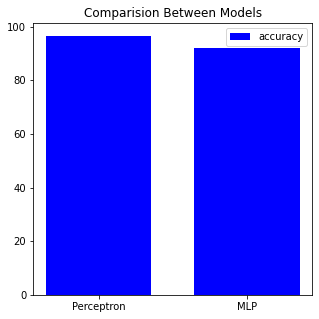

In [267]:
plt.figure(figsize=(5,5))
scores=['Perceptron','MLP']
accscore=[96.5,92]
w=0.71
bar=np.arange(len(scores))

plt.bar(bar,accscore,w,label="accuracy",color='blue')
plt.xticks(bar, scores)
plt.legend()
plt.title("Comparision Between Models")
plt.show()

**Inference**: Perceptron neural_network is better model for prediction than MLP from above graph.